<a href="https://colab.research.google.com/github/mdafonso/Propensao-de-Compra/blob/main/Projeto_empresa_a%C3%A9rea_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando os Dados**

In [ ]:
# Conexão com BD
import sqlite3
import pandas as pd
conn = sqlite3.connect( "database.db" )

In [ ]:
consulta_atividade = "SELECT * FROM flight_activity fa LEFT JOIN flight_loyalty_history flh ON (fa.loyalty_number=flh.loyalty_number)"

df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


# **1. Consulta dos Dados**

In [ ]:
consulta_atividade = "SELECT * FROM flight_activity LIMIT 10"

df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [ ]:
consulta_atividade = """

 SELECT
   fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked
  FROM
    flight_activity fa
  WHERE
    flights_booked > 3

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked
0,100102,2017,1,10
1,100140,2017,1,6
2,100428,2017,1,6
3,863070,2017,9,8
4,100727,2017,1,11


1- Selecione as colunas: **loyalty_number,year,month,flights_booked,total_flights,distance** e **points_accumulated** da tabela "**flight_activity**".

In [ ]:
consulta_atividade = """

  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM
    flight_activity fa

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,100018,2017,1,3,3,1521,152.0
1,100102,2017,1,10,14,2030,203.0
2,100140,2017,1,6,6,1200,120.0
3,100214,2017,1,0,0,0,0.0
4,100272,2017,1,0,0,0,0.0


2- Selecione as mesmas colunas, porém, recupere somente as linhas cuja coluna **distance** é maior do que 2000,da tabela "**flight_activity**".

In [ ]:
consulta_atividade = """

  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM
    flight_activity fa
  WHERE
    distance > 2000

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,100102,2017,1,10,14,2030,203.0
1,100550,2017,1,3,3,2037,203.0
2,863070,2017,9,8,15,4245,424.0
3,100753,2017,1,8,12,3264,326.0
4,100816,2017,1,9,10,2340,234.0


3- Selecione as mesmas colunas, porém, recupere somente as linhas cuja coluna **distance** é maior do que 2000 é a coluna **month** é igual a 9, da tabela "**flight_activity**".

In [ ]:
consulta_atividade = """

  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM
    flight_activity fa
  WHERE
    distance > 2000 and month = 9

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,863070,2017,9,8,15,4245,424.0
1,691626,2018,9,8,15,4245,424.0
2,444931,2017,9,11,18,4428,442.0
3,409051,2018,9,11,18,4428,442.0
4,975387,2018,9,13,18,4428,442.0


4- Selecione as mesmas colunas, porém, recupere somente as linhas cuja coluna **distance** é maior do que 2000 ou a coluna **points_accumulated** é menor que 100, da tabela "**flight_activity**".

In [ ]:
consulta_atividade = """

  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM
    flight_activity fa
  WHERE
    distance > 2000 or points_accumulated < 100

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,100102,2017,1,10,14,2030,203.0
1,100214,2017,1,0,0,0,0.0
2,100272,2017,1,0,0,0,0.0
3,100301,2017,1,0,0,0,0.0
4,100364,2017,1,0,0,0,0.0


5- Selecione as mesmas colunas, porém, recupere somente as linhas cuja coluna **loyalty_card** é igual a **Star** da tabela "**flight_loyalty_history**".

In [ ]:
consulta_atividade = """

  SELECT
    *
  FROM
    flight_loyalty_history flh
  WHERE
    loyalty_card = "Star"

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


6- Selecione as colunas: **loyalty_number, city, gender** e **loyalty_card**, salary da tabela "**flight_loyalty_history**".

In [ ]:
consulta_atividade = """

  SELECT
    flh.loyalty_number,
    flh.city,
    flh.gender,
    flh.loyalty_card,
    flh.salary
  FROM
    flight_loyalty_history flh


"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,city,gender,loyalty_card,salary
0,480934,Toronto,Female,Star,83236.0
1,549612,Edmonton,Male,Star,NaN
2,429460,Vancouver,Male,Star,NaN
3,608370,Toronto,Male,Star,NaN
4,530508,Hull,Male,Star,103495.0


7- Selecione as mesmas colunas, porém, recupere somente as linhas cuja coluna **gender** é igual a **Female** da tabela
“**flight_loyalty_history**”

In [ ]:
consulta_atividade = """

  SELECT
    flh.loyalty_number,
    flh.city,
    flh.gender,
    flh.loyalty_card,
    flh.salary
  FROM
    flight_loyalty_history flh
  WHERE
    gender = "Female"

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,city,gender,loyalty_card,salary
0,480934,Toronto,Female,Star,83236.0
1,927943,Toronto,Female,Star,NaN
2,852392,Montreal,Female,Star,100159.0
3,932823,Vancouver,Female,Star,66444.0
4,144514,Dawson Creek,Female,Star,49618.0


8- Selecione as colunas: **loyalty_number, month, year, distance, flights_booked e total_flights** da tabela “**flight_activity**”, e
recupere somente as linhas cuja coluna “**flights_booked**” é maior do que 10 e a coluna “**flights_booked**” é menor do que 12,
da tabela “**flight_activity**”

In [ ]:
consulta_atividade = """

  SELECT
    fa.loyalty_number,
    fa.month,
    fa.year,
    fa.distance,
    fa.flights_booked,
    fa.total_flights
  FROM
    flight_activity fa
  WHERE
    flights_booked > 10 and flights_booked < 12

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,month,year,distance,flights_booked,total_flights
0,100727,1,2017,1144,11,11
1,100883,1,2017,3124,11,11
2,101515,1,2017,1100,11,11
3,101594,1,2017,3399,11,11
4,104353,1,2017,1343,11,17


# **2. Preparação dos Dados**

1- Número de dados faltantes em cada coluna

In [ ]:
df_atividade.isna()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


# **3. Inspecionando os Dados**

1- Verificar o número de linhas (dataframe)

In [ ]:
df_atividade.shape[0]

405624

2- Verificar número de colunas

In [ ]:
df_atividade.shape[1]

26

In [ ]:
df_atividade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  loyalty_number               405624 non-null  int64  
 11  country                      405624 non-null  object 
 12  province                     405624 non-null  object 
 13 

In [ ]:
menor_distancia = df_atividade.loc[:,"distance"].min()
maior_distancia = df_atividade.loc[:,"distance"].max()
media_distancia = df_atividade.loc[:,"distance"].mean()
soma_distancia = df_atividade.loc[:,"distance"].sum()

In [ ]:
print(menor_distancia)
print(maior_distancia)
print(media_distancia)
print(soma_distancia)

0
6293
1208.880058872256
490350765


# **4. Preparação dos Dados**

1- Número de dados faltantes em cada coluna

In [ ]:
df_atividade.isna().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
loyalty_number                      0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

2- Selecionar somente as colunas que contém números

In [ ]:
df_atividade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  loyalty_number               405624 non-null  int64  
 11  country                      405624 non-null  object 
 12  province                     405624 non-null  object 
 13 

In [ ]:
colunas = ["year", "month", "flights_booked", "flights_with_companions", "total_flights", "distance", "points_accumulated",
           "salary", "clv", "loyalty_card"]

df_colunas_numericas = df_atividade.loc[:, colunas]


3- Remover linhas que contém dados faltantes

In [ ]:
df_dados_completos = df_colunas_numericas.dropna()

4- Verificar se existe dados faltantes

In [ ]:
df_dados_completos.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

In [ ]:
df_dados_completos.shape[0]

302952

# **5. Machine Learning**

In [ ]:
from sklearn import tree as tr

X_atributos = df_dados_completos.drop( columns="loyalty_card")
y_rotulos = df_dados_completos.loc[:,"loyalty_card"]

modelo = tr.DecisionTreeClassifier(max_depth=2)

modelo_treinado = modelo.fit( X_atributos, y_rotulos)

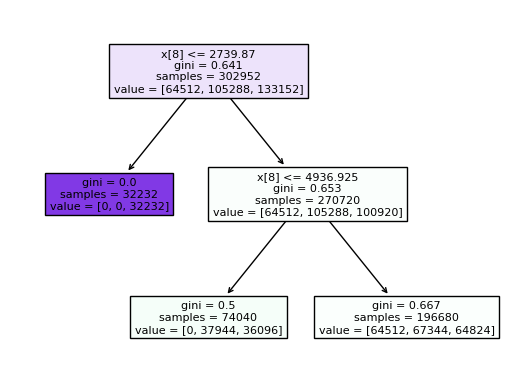

In [ ]:
tr.plot_tree(modelo_treinado, filled=True);

# **6. Resultado**

In [ ]:
X_novo = X_atributos.sample()
previsao = modelo_treinado.predict_proba( X_novo )

print("Prob - Aurora: {:.1f}% - Nova: {:.1f}% - Star: {:.1f}%".format(100*previsao[0][0], 100*previsao[0][1], 100*previsao[0][2]))


Prob - Aurora: 32.8% - Nova: 34.2% - Star: 33.0%


# **7. Painel de Visualização**

In [ ]:
!pip install gradio

In [ ]:
import numpy as np
from __future__ import annotations
from typing import Iterable
import gradio as gr
from gradio.themes.base import Base
from gradio.themes.utils import colors, fonts, sizes
import time

In [ ]:
class Seafoam(Base):
    def __init__(
        self,
        *,
        primary_hue: colors.Color | str = colors.orange,
        secondary_hue: colors.Color | str = colors.orange,
        neutral_hue: colors.Color | str = colors.blue,
        spacing_size: sizes.Size | str = sizes.spacing_md,
        radius_size: sizes.Size | str = sizes.radius_md,
        text_size: sizes.Size | str = sizes.text_lg,
        font: fonts.Font
        | str
        | Iterable[fonts.Font | str] = (
            fonts.GoogleFont("Quicksand"),
            "ui-sans-serif",

        ),

    ):
        super().__init__(

            primary_hue=primary_hue,
            secondary_hue=secondary_hue,
            neutral_hue=neutral_hue,
            spacing_size=spacing_size,
            radius_size=radius_size,
            text_size=text_size,
            font=font,

        )
        super().set(

            button_primary_background_fill="linear-gradient(90deg, *primary_300, *secondary_400)",
            button_primary_background_fill_hover="linear-gradient(90deg, *primary_200, *secondary_300)",
            slider_color="*secondary_300",
            block_border_width="3px",
            button_large_padding="32px",

            )

seafoam = Seafoam()

def predict(*args):
  X_novo = np.array( [args] ).reshape(1, -1)
  previsao = modelo_treinado.predict_proba( X_novo )

  return{"Aurora":previsao[0][0], "Nova":previsao[0][1], "Star":previsao[0][2]}

with gr.Blocks(theme=seafoam) as demo:
  gr.Markdown( """ # **Propensão de Compra** """)

  with gr.Row():
    with gr.Column():
      gr.Markdown( """ ### Atributos dos Clientes """)

      year                       = gr.Slider (label='Year', minimum=2017, maximum=2018, step=1, randomize=True)
      month                      = gr.Slider (label='Month', minimum=1, maximum=12,step=1, randomize=True)
      flights_booked             = gr.Slider (label='Flights booked', minimum=0, maximum=21,step=1, randomize=True)
      flights_with_companions    = gr.Slider (label='Flights with companions', minimum=0, maximum=11,step=1, randomize=True)
      total_flights              = gr.Slider (label='Total flights', minimum=0, maximum=32,step=1, randomize=True)
      distance                   = gr.Slider (label='Distance', minimum=0, maximum=6293,step=1, randomize=True)
      points_accumulated         = gr.Slider (label='Points accumulated', minimum=0, maximum=676.50,step=0.1, randomize=True)
      salary                     = gr.Slider (label='Salary', minimum=58486.00, maximum=407228.00,step=0.1, randomize=True)
      clv                        = gr.Slider (label='Clv', minimum=2119.89, maximum=83325.38,step=0.1, randomize=True)

      with gr.Row():

        with gr.Row():
          predict_bnt = gr.Button(value="Previsão")

    with gr.Column():
      gr.Markdown(""" ### Propenção de Compra dos Clientes """)
      label =gr.Label()

  predict_bnt.click( fn=predict,
                  inputs=[year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv],
                  outputs=[label] )
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bf7eb43229c7dcf3f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
